<a href="https://colab.research.google.com/github/Angelica2929/sales_prediction/blob/main/Prediccion_Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargar datos e importar biblioteca

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Material Apoyo/sales_predictions.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [14]:
#Verificamos si existen datos nulos
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


1) ¿Cuántas filas y columnas?

In [15]:
# Hay 8253 filas y 12 columnas 

df.shape

(8523, 12)

2)¿Cuáles son los tipos de datos en cada variable?

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [17]:
#No hay duplicados.
df.duplicated().sum()

0

4) Identifiquen los valores faltantes.

In [18]:
#Mostrar valores faltantes
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
#Cuantificar valores faltantes por columna, para este ejercicio las columnas Weight y Size tienen valores nulos como se muestra a continaucion:

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).


Utilice el codigo 'isna' ya que agrega como True a los valores nulos y devuelve un recuento de nulos para cada columna.

Despues de verificar el % que representa dentro del total, que para Weight es el 17,16% y el 28,27%, decido no eliminar ninguna fila, ya que puedo sesgar el ejercicio, por lo tanto voy a reemplzar los valores con 0 para categoria de Size y "Missing" para la categoria  de '\tOutlet_Size'.

In [20]:
df['Item_Weight'].fillna(0, inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [22]:
df['Outlet_Size'].fillna('Missing', inplace=True)
df.head(1500)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,FDZ49,11.000,Regular,0.133120,Canned,221.5798,OUT035,2004,Small,Tier 2,Supermarket Type1,4187.2162
1496,NCJ17,7.680,Low Fat,0.255348,Health and Hygiene,84.4224,OUT010,1998,Missing,Tier 3,Grocery Store,170.4448
1497,FDB17,13.150,Low Fat,0.036880,Frozen Foods,181.3976,OUT017,2007,Missing,Tier 2,Supermarket Type1,3078.6592
1498,FDP48,7.520,Regular,0.044203,Baking Goods,182.9950,OUT018,2009,Medium,Tier 3,Supermarket Type2,4394.2800


6) Confirmen que no hay valores faltantes después de abordarlos.

In [23]:
# Ya no hay valores faltantes en las categorias ITEM_WEIGHT y OUTLET_SIZE, ya que fueron reemplazadosee en el punto anterior.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [28]:
#La columna Item Fat Content contiene valores caategoricos errones, se procede a corregirlos en la siguiente linea:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [30]:
#Se corrigen los errores en categorias, quedando finalmente solo 2 asi:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [33]:
#Se calculan todas las estadsiticas para la categoria Peso.
df['Item_Weight'].describe()

count    8523.000000
mean       10.650590
std         6.431899
min         0.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

Para la tercera parte, la tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada:

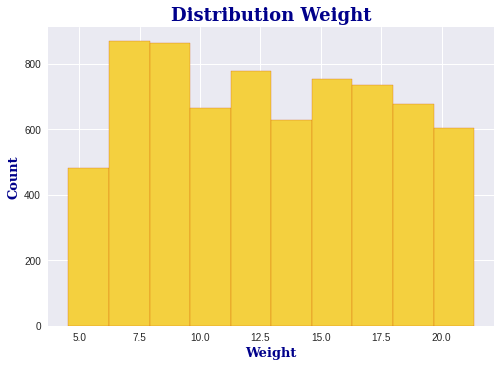

In [71]:
#Histograma para ver las distribuciones de diversas características en el conjunto de datos. 
#El siguiente histograma nos muestra que hay mayor numero de datos en el intervalo de 6-9 de peso, y menor frecuencia
# para el primer intervalode 5 a 6.
plt.style.use('seaborn')
df['Item_Weight'].hist(edgecolor='#D35400', color='#F4D03F')
plt.ylabel("Count", fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 13})
plt.xlabel("Weight",fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 13})
plt.title('Distribution Weight', fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.show()


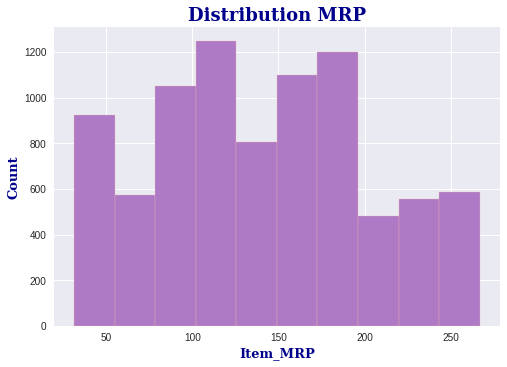

In [70]:
#En este histograma, en el que me muestra el plan de requerimiento de materiales, se observan unos picos para el intervalo
#100-120 y 170-200.
plt.style.use('seaborn')
df['Item_MRP'].hist(edgecolor='#F5B7B1', color='#AF7AC5')
plt.ylabel("Count", fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 13})
plt.xlabel("Item_MRP",fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 13})
plt.title('Distribution MRP', fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.show()

In [75]:
cont_grasa = df['Item_Weight'].values
cont_grasa # sacar arreglos

array([ 9.3 ,  5.92, 17.5 , ..., 10.6 ,  7.21, 14.8 ])

In [76]:
ventas_tienda = df['Item_Outlet_Sales'].values
ventas_tienda # sacar arreglos

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

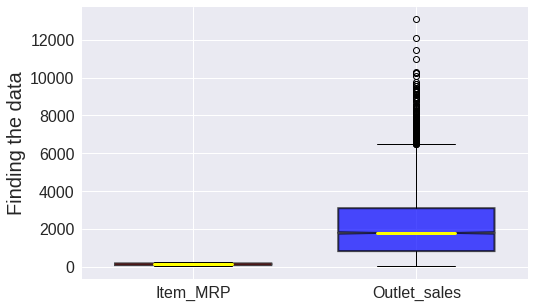

In [91]:
MRP = df['Item_MRP'].values #sacar en una variable la info de mi DF
Outlet_sales = df['Item_Outlet_Sales'].values
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([MRP, Outlet_sales],
           notch = True,
           labels=['Item_MRP', 'Outlet_sales'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=3, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .7)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('', fontsize = 20);
plt.ylabel('Finding the data', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

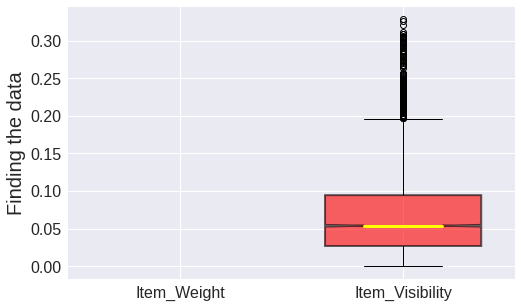

In [90]:
Weight = df['Item_Weight'].values #sacar en una variable la info de mi DF
Visibility = df['Item_Visibility'].values
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([Weight, Visibility],
           notch = True,
           labels=['Item_Weight', 'Item_Visibility'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=3, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .6)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][1]
boxplot1.set_facecolor('red')
plt.xlabel('', fontsize = 20);
plt.ylabel('Finding the data', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

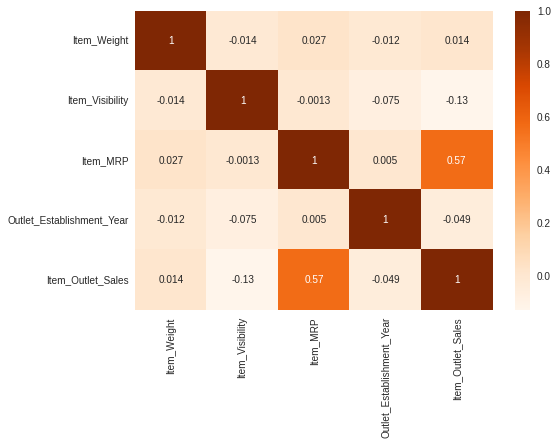

In [89]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Oranges', annot= True)